# Exploring the Impact of Airbnb in Athens

The rapid growth of the sharing economy has significantly transformed the hospitality industry, with Airbnb emerging as a major player in providing alternative accommodations worldwide. In this project, we delve into the dynamics of Airbnb in Athens, utilizing data collected by [Inside AirBnB](http://insideairbnb.com). By analyzing this dataset, we aim to uncover insights into the popularity of neighborhoods, pricing patterns, availability trends, host behaviors, and spatial distribution of listings in the city of Athens.

## Importing Libraries
We start by importing a few of the packages we'll need.

Most data analytics in Python is performed using the following packages:
   * [pandas](https://pandas.pydata.org/)
   
   * [matplotlib](https://matplotlib.org/)
   
   * [seaborn](https://seaborn.pydata.org)
   * [folium](https://python-visualization.github.io/folium/latest/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Importing data
* The data downloaded from http://insideairbnb.com/get-the-data.html are in the form of a CSV files called `listings.csv` and `calendar.csv`.
* Looking into the documentation:
* The **listings data set** contains 13182 rows and 18 columns including:
1) `id`: Airbnb's unique identifier for the listing.
2) `name`: Name of the listing.
3) `host_id`: Airbnb's unique identifier for the host/user.
4) `host_name`: Name of the host. Usually just the first name(s).
5) `neighbourhood`: The neighbourhood name in greek.
6) `neighbourhood_group`: The neighbourhood group geocoded using latitude and longitude against open or public shapefiles.
7) `latitude`: Latitude using the World Geodetic System (WGS84) projection.
8) `longitude`: Longitude using the World Geodetic System (WGS84) projection.
9) `room_type`: Type of room (e.g., Entire home/apt, Private room, Shared room).
10) `price`: Daily price in local currency. Note: $ sign may be used despite locale.
11) `minimum_nights`: Minimum number of nights stay for the listing (calendar rules may be different).
12) `number_of_reviews` : The number of reviews the listing has.
13) `last_review`: The date of the last/newest review.
14) `reviews_per_month`: Average number of reviews per month.
15) `calculated_host_listings_count`: Number of listings the host has in the current scrape, in the city/region geography.
16) `availability_365`: Availability of the listing x days in the future as determined by the calendar.
17) `number_of_reviews_ltm`: The number of reviews the listing has (in the last 12 months)
18) `license`: The licence/permit/registration number 

* The **calendar data set** records the price, availability and other details from the listing's calendar for each day of the next 365 days:			

In [2]:
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')

## Keeping only useful variables

* From the listings data set only the variables `id`, `name`, `neighbourhood`, `latitude`, `longitude`, `room_type`, `price`, `number_of_reviews`, `reviews_per_month` and `host_id` are kept in  the `listings_df` DataFrame.

In [3]:
listings_df=pd.DataFrame(listings[['id','name','neighbourhood','latitude','longitude','room_type','price','number_of_reviews','reviews_per_month','host_id']])

## Looking into data
### Listings DataFrame
Replacing `room_type` column within this DataFrame and replaces all occurrences of the value 'Entire home/apt' with 'Entire Home/Apartment'. 

In [4]:
listings_df['room_type'] = listings_df['room_type'].replace('Entire home/apt', 'Entire Home/Apartment')

Searching the data for **missing values**.
* `price` has 366 NA values.
* `reviews_per_month` have 2114 NAs.

In [5]:
listings_df.isna().sum()

id                      0
name                    0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                 366
number_of_reviews       0
reviews_per_month    2114
host_id                 0
dtype: int64

### Studying variables with missing values

* By adding the total reviews of all listings having NAs in `reviews_per_month` it is obvious that those listings do not have any reviews.


In [6]:
listings_df.number_of_reviews[listings_df.reviews_per_month.isna()==True].sum()

0

* So `reviews_per_month` missing values will be replaced by zeroes.

In [7]:
listings_df['reviews_per_month']=listings_df['reviews_per_month'].fillna(0)

* For missing values in `price` the mean price of each listing's neigbourhood will be used.

In [8]:
# Step 1: Calculate the mean price for each neighborhood
neighborhood_mean_prices = listings_df.groupby('neighbourhood')['price'].mean().round()

# Step 2: Replace missing values in 'price' column with mean price of the neighborhood
listings_df['price'] = listings_df.apply(
    lambda row: neighborhood_mean_prices[row['neighbourhood']] if pd.isnull(row['price']) else row['price'],
    axis=1
)
pd.DataFrame(neighborhood_mean_prices)

,price
neighbourhood,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,89.0
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,51.0
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,64.0
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,54.0
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,52.0
ΑΚΡΟΠΟΛΗ,192.0
ΑΜΠΕΛΟΚΗΠΟΙ,67.0
ΑΝΩ ΚΥΨΕΛΗ,46.0
ΑΝΩ ΠΑΤΗΣΙΑ,55.0


* Checking if the changes took place

In [9]:
listings_df.isna().sum()

id                   0
name                 0
neighbourhood        0
latitude             0
longitude            0
room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
host_id              0
dtype: int64

### Calendar Data Set

In [10]:
df_cal = pd.DataFrame(calendar[['listing_id','date','available','price']])
# Convert 'date' column to datetime type
df_cal['date'] = pd.to_datetime(df_cal['date'])

# Convert 'price' column to float type
# df_cal['price'] = df_cal['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_cal['price'] = df_cal['price'].str.replace('$', '').replace('[\$,]', '', regex=True).astype(float)

* Calendar has no missing values.

In [11]:
df_cal.isna().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

## Neighbourhood Listings in Descending Order
* The following table shows number of listings per neighbourghood , in decreasing neighbourhood popularity order.
* The most popular neighbourghood is **ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ** and the least popular is **ΡΗΓΙΛΛΗΣ**.

In [12]:
neighborhood_listings = pd.DataFrame(listings_df.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False))
neighborhood_listings.columns = ['Number of Reviews'] 
neighborhood_listings

,Number of Reviews
neighbourhood,
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,160405
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,78547
ΝΕΟΣ ΚΟΣΜΟΣ,49480
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,39853
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37880
ΑΚΡΟΠΟΛΗ,28982
ΘΗΣΕΙΟ,28753
ΚΕΡΑΜΕΙΚΟΣ,21492
ΠΑΓΚΡΑΤΙ,19432


## Neighbourhood Prices in Descending Order
* A table has been compiled to present prices per neighbourhood, arranged by descending median prices. Each entry includes the median and mean prices, standard deviation, and the number of listings available. 

In [13]:
agg_functions = {
    'price': ['median', 'mean', 'std'],
    'neighbourhood': 'count'
}

# Group by neighbourhood and calculate aggregated values
neighborhood_prices = listings_df.groupby('neighbourhood').agg(agg_functions).sort_values(('price', 'median'), ascending=False)

# Rename columns for clarity
neighborhood_prices.columns = ['Median Price', 'Mean Price', 'Standard Deviation', 'Number of Listings']

# Display the table
neighborhood_prices

,Median Price,Mean Price,Standard Deviation,Number of Listings
neighbourhood,,,,
ΡΗΓΙΛΛΗΣ,139.0,653.500000,1071.934544,4
ΖΑΠΠΕΙΟ,109.5,211.098837,621.269250,172
ΚΟΛΩΝΑΚΙ,100.0,123.770492,94.795598,427
ΑΚΡΟΠΟΛΗ,96.0,191.605063,708.399641,395
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,89.0,131.773523,301.702754,2455
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,85.0,112.668426,175.290875,1137
ΚΕΡΑΜΕΙΚΟΣ,82.0,116.426136,141.812284,352
ΘΗΣΕΙΟ,79.0,108.571788,109.049650,397
ΙΛΙΣΙΑ,70.5,84.394495,52.403349,218


## Availability per Day 
* A plot has been created, depicting the number of listings available per day on the y-axis, and the date on the x-axis.

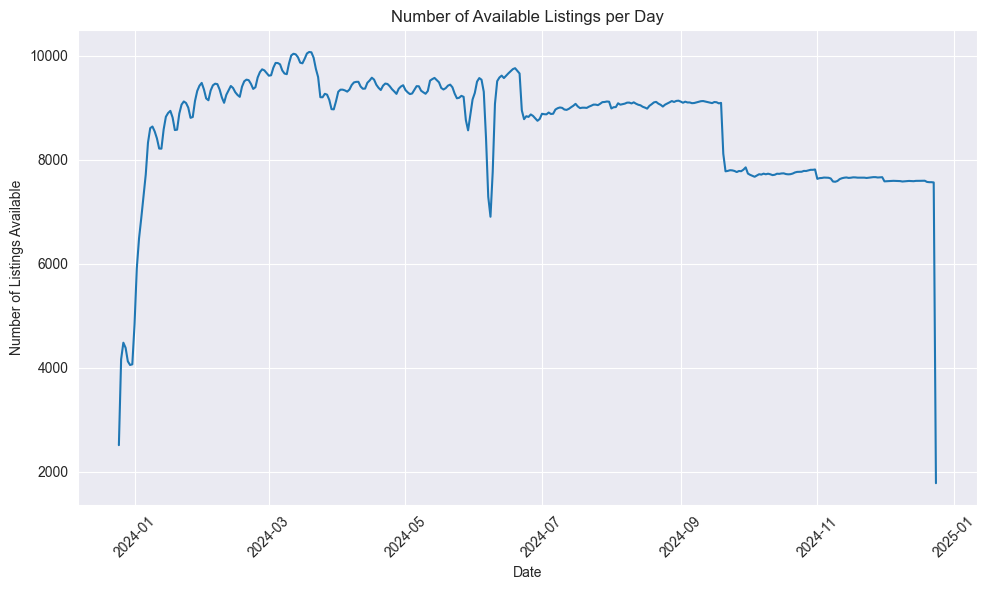

In [14]:
# Filter only available listings
available_listings = df_cal[df_cal['available'] == 't']

# Group by date and count the number of available listings per day
available_per_day = available_listings.groupby('date').size()

# Plotting
sns.set_style("dark")
plt.figure(figsize=(10, 6))
sns.lineplot(x=available_per_day.index, y=available_per_day.values)
plt.title('Number of Available Listings per Day')
plt.xlabel('Date')
plt.ylabel('Number of Listings Available')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

* A histogram has been created to illustrate the distribution of reviews per listing. The histogram bins the number of reviews, ranging from the smallest amount of reviews in a listing to the maximum number of reviews rounded up to the closest hundred.

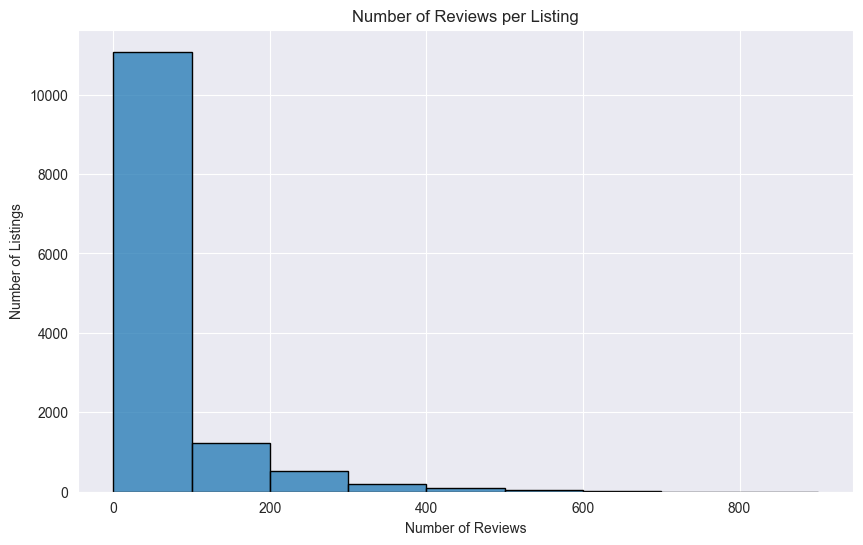

In [15]:
sns.set_style("dark")
plt.figure(figsize=(10, 6))
sns.histplot(listings['number_of_reviews'], bins=range(0, listings['number_of_reviews'].max() + 100, 100), edgecolor='black')
plt.title('Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

* As you can see, most listings have up to 100 reviews and a minority has over 400 reviews.

* The average occupancy per listing per month can be calculated by first determining the average reviews per month and then assuming that half of the bookings result in reviews. 

In [16]:
# Calculate average occupancy per listing per month
average_occupancy = (listings_df.reviews_per_month.mean()*2)
print("The average occupancy per listing is",round(average_occupancy,1),"bookings per month.")

The average occupancy per listing is 2.8 bookings per month.


* To calculate the average income per month, assuming each booking is for a three-night stay, the average price charged across all listings is multiplied by the number of bookings per month. The average income is derived from this product, representing the average revenue generated by listings over a monthly period.

In [17]:
# Calculate average income per listing
average_income_per_month = listings_df.price.mean()*3*average_occupancy
print("The average income per month for a listing is",round(average_income_per_month,2),"€.")

The average income per month for a listing is 899.64 €.


## Listings per Room Type

### Number of listings per room type, in absolute numbers, and also in percentages
* The number of listings per room type is displayed both in absolute numbers and percentages. This presentation provides insights into the distribution of listings across different room types, offering a comprehensive view of the variety and popularity of accommodation options.

In [18]:
# Listings per Room Type - Absolute Numbers
room_type_counts = listings_df['room_type'].value_counts()

# Listings per Room Type - Percentages
room_type_percentages = (room_type_counts / len(listings_df.room_type)) * 100

# Display Listings per Room Type
listings_per_room_type = pd.DataFrame({'Count': room_type_counts, 'Percentage': room_type_percentages})
listings_per_room_type

,Count,Percentage
room_type,,
Entire Home/Apartment,11906,90.320134
Private room,1091,8.276438
Hotel room,102,0.773782
Shared room,83,0.629646


### Listings per neighrbourhood and room type
* The number of listings per neighbourhood and room type is displayed, offering insights into the distribution of accommodation options across different neighbourhoods and room types. 

In [19]:
# Listings per Neighbourhood and Room Type
listings_per_neighbourhood_room_type = listings_df.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)
listings_per_neighbourhood_room_type

room_type,Entire Home/Apartment,Hotel room,Private room,Shared room
neighbourhood,,,,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,53,0,0,0
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,31,0,5,0
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,709,0,108,13
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,94,0,9,0
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,86,0,2,0
ΑΚΡΟΠΟΛΗ,369,6,20,0
ΑΜΠΕΛΟΚΗΠΟΙ,427,0,30,4
ΑΝΩ ΚΥΨΕΛΗ,102,0,16,0
ΑΝΩ ΠΑΤΗΣΙΑ,61,0,3,0


## Prices per Day
* A table has been created showcasing the average price per listing per day. 

In [20]:
# Group by date and calculate the average price per listing per day
average_price_per_day = pd.DataFrame(df_cal.groupby('date')['price'].mean())
average_price_per_day

,price
date,
2023-12-25,88.523767
2023-12-26,101.385222
2023-12-27,101.385222
2023-12-28,101.385222
2023-12-29,101.385222
...,...
2024-12-20,101.385222
2024-12-21,101.385222
2024-12-22,101.385222


* A table has been created showcasing the average price of available listings per day.

In [21]:
# Calculate average price per day for available listings
available_data = df_cal[df_cal['available'] == 't']
average_price_per_day_available = pd.DataFrame(available_data.groupby('date')['price'].mean())
average_price_per_day_available

,price
date,
2023-12-25,100.550598
2023-12-26,109.293679
2023-12-27,107.025887
2023-12-28,102.302761
2023-12-29,102.354925
...,...
2024-12-20,101.464220
2024-12-21,101.454353
2024-12-22,101.386048


* A graph has been drawn to visualize the data from the table, offering a clear representation of the average price trends over time for listings.

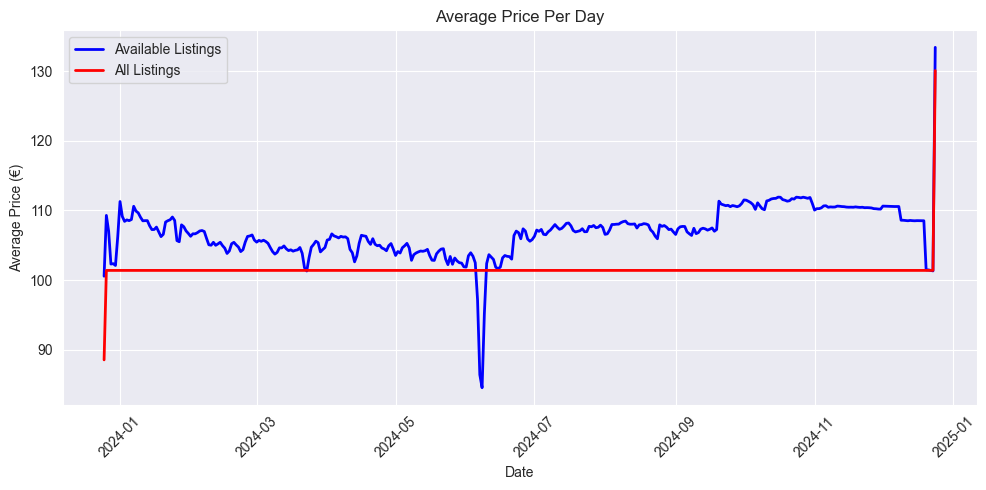

In [23]:
# Visualize the data with both lines
plt.figure(figsize=(10, 5))

# Plot for available listings
plt.plot(average_price_per_day_available.index, average_price_per_day_available['price'], label='Available Listings', color='blue', linewidth=2)

# Plot for all listings
plt.plot(average_price_per_day.index, average_price_per_day['price'], label='All Listings', color='red', linewidth=2)

plt.title('Average Price Per Day')
plt.xlabel('Date')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

* The price of all listings is at its lowest during the Christmas of 2023 and at its highest during Christmas of 2024, while during the rest of the year is constant around 101€.
* The price of available listings has its lowest point during June of 2024 and at its highest during Christmas of 2024, while during the rest of the year is not constant.

## Listings per Host
* A table has been created to display the number of listings per host, sorted in descending order based on the number of listings.

In [24]:
# Create a table with the number of listings per host in descending order
listings_per_host = listings_df['host_id'].value_counts().reset_index()
listings_per_host.index += 1
listings_per_host.columns = ['Host ID', 'Number of Listings']
listings_per_host = listings_per_host.sort_values(by='Number of Listings', ascending=False)
listings_per_host

,Host ID,Number of Listings
1,20104194,121
2,113548208,101
3,90390850,68
4,113353393,64
5,47267002,62
...,...,...
3060,69024112,1
3061,76167139,1
3062,4155182,1
3063,541487158,1


* The host with the most listings is the one with Host ID: **20104194**.

* A graph has been generated to visualize the distribution of listings per host, where the hosts are ranked based on the number of listings they have. Each point (x, y) on the graph represents the x-th highest hosting host with y listings.

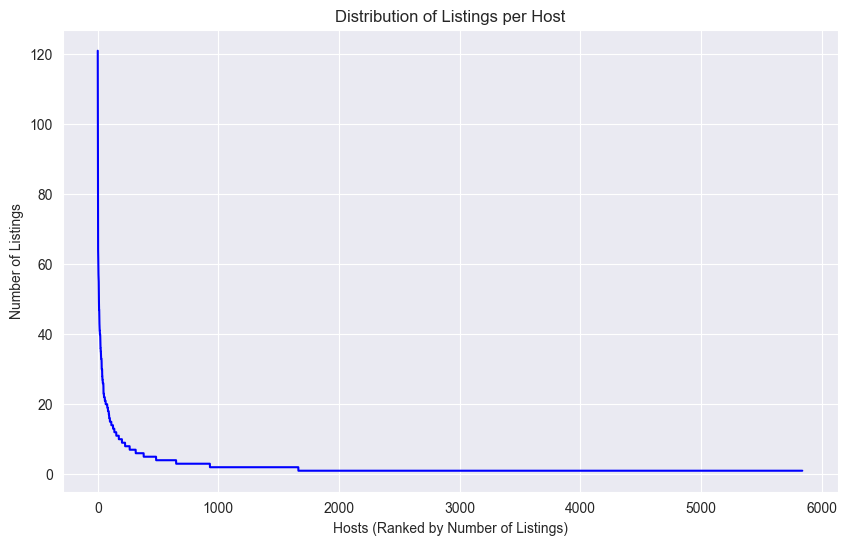

In [25]:
# Generate a graph to show the distribution of listings per host
plt.figure(figsize=(10, 6))
plt.plot(listings_per_host['Number of Listings'].values, marker='', linestyle='-', color='b')
plt.title('Distribution of Listings per Host')
plt.xlabel('Hosts (Ranked by Number of Listings)')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

* Following the initial plot, another graph has been generated with the x-axis in logarithmic scale.

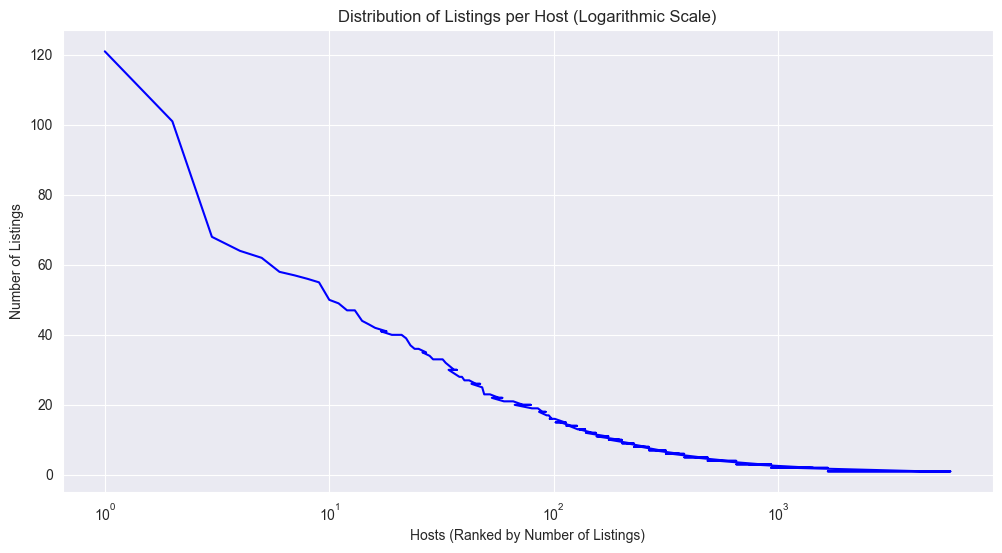

In [26]:
# Generate another plot with x-axis in logarithmic scale
plt.figure(figsize=(12, 6))
plt.plot(listings_per_host.index,listings_per_host['Number of Listings'].values, marker='', linestyle = '-', color='b')
plt.title('Distribution of Listings per Host (Logarithmic Scale)')
plt.xlabel('Hosts (Ranked by Number of Listings)')
plt.ylabel('Number of Listings')
plt.xscale('log')
plt.grid(True)
plt.show()

## Visualize Listings
* An interactive map centered on Athens has been created using the **Folium** library. 
* The map incorporates markers for each listing, clustered using [Marker Cluster](https://python-visualization.github.io/folium/latest/user_guide/plugins/marker_cluster.html) for improved performance and visualization. 
* Each marker displays essential details such as the name of the listing and the price per night in euros upon clicking. 
* The maximum zoom level has been limited to 15 to optimize resource usage and enhance user experience. 
* The map is saved to an external HTML file named "athens_airbnb_map.html" for easy accessibility and viewing in any web browser.

In [27]:
from folium.plugins import MarkerCluster

# Create map centered on Athens
athens_map = folium.Map(location=[37.9838, 23.7275], zoom_start=12, max_zoom=15)

# Create MarkerCluster for clustering markers
marker_cluster = MarkerCluster().add_to(athens_map)

# Add markers to the MarkerCluster
for index, row in listings_df.iterrows():
    popup_content = f"""
<div style="width: 400px;">
    <b><span style="color: blue;">Description:</span></b> <span style="font-weight: bold;">{row['name']}</span><br>
    <b><span style="color: black;">Room Type:</span></b> <span style="font-weight: bold;">{row['room_type']}</span><br>
    <b><span style="color: red;">Price per night:</span></b> <span style="font-weight: bold;">{row['price']}€</span><br>
</div>
"""
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_content),
        icon=folium.Icon(icon='home', color='red')
    ).add_to(marker_cluster)

# Save map to HTML file
athens_map.save("athens_airbnb_map.html")
